In [1]:
import pandas as pd

In [2]:
import numpy as np

## Loading Data

In [3]:
dataset=pd.read_csv('/users/mukuldevanand/Desktop/fake_news/fake.csv')

In [4]:
print("Types and counts of stories", dataset.groupby(["type"]).size())

Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


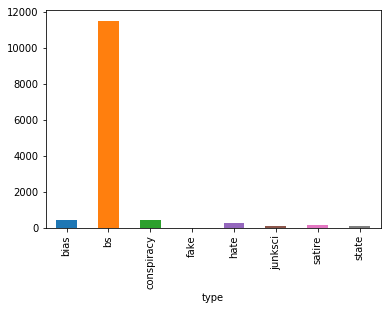

In [50]:
dataset.groupby(['type']).size().plot(kind='bar')

## Preprocessing

In [6]:
all_news=dataset[dataset["type"]!='bs']
all_news.shape

(1507, 20)

In [7]:
filtered_data=all_news[['title', 'text', 'type']]

In [8]:
filtered_data.title.fillna("", inplace=True)
filtered_data.text.fillna("", inplace=True)
filtered_data[0:2]

/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias


In [9]:
filtered_data['label']=filtered_data.type.map({
    'bias':1,
    'conspiracy':2,
    'hate':3,
    'satire':4,
    'state':5,
    'junksci':6,
    'fake':7
})

/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
filtered_data.head(5)

,title,text,type,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias,1
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias,1
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias,1
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias,1
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1


In [11]:
all_text=filtered_data['title'] +" "+ filtered_data['text']

In [12]:
all_text.head(5)

0    Muslims BUSTED: They Stole Millions In Gov’t B...
1    Re: Why Did Attorney General Loretta Lynch Ple...
2    BREAKING: Weiner Cooperating With FBI On Hilla...
3    PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4    FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
dtype: object

In [13]:
x=all_text
x.shape

(1507,)

In [14]:
print(x.head(5))

0    Muslims BUSTED: They Stole Millions In Gov’t B...
1    Re: Why Did Attorney General Loretta Lynch Ple...
2    BREAKING: Weiner Cooperating With FBI On Hilla...
3    PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4    FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
dtype: object


In [15]:
y=filtered_data['label']
y.shape

(1507,)

In [16]:
x.head(5)

0    Muslims BUSTED: They Stole Millions In Gov’t B...
1    Re: Why Did Attorney General Loretta Lynch Ple...
2    BREAKING: Weiner Cooperating With FBI On Hilla...
3    PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4    FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
dtype: object

In [17]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Form Bag of words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [19]:
X_data=vect.fit_transform(x.values.astype('U')).todense()
X_data.shape

(1507, 30661)

In [20]:
print(X_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Split Data into Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,y,random_state=1,test_size=0.20)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(1205, 30661)
(1205,)
(302, 30661)
(302,)


## Import SVM

In [22]:
from sklearn import svm

In [23]:
model=svm.SVC(kernel='linear')

In [24]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print(accuracy_score(pred,Y_test)*100)

74.17218543046357


## Confusion Matrix SVM

In [28]:
import scikitplot as skplt

In [29]:
true_label=Y_test.map({
    1:'bias',
    2:'conspiracy',
    3:'hate',
    4:'satire',
    5:'state',
    6:'junksci',
    7:'fake'
})

In [30]:
pred_label=pd.Series(pred).map({
    1:'bias',
    2:'conspiracy',
    3:'hate',
    4:'satire',
    5:'state',
    6:'junksci',
    7:'fake'
})

In [31]:
labels=['bias','conspiracy','hate','satire','state','fake']

/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


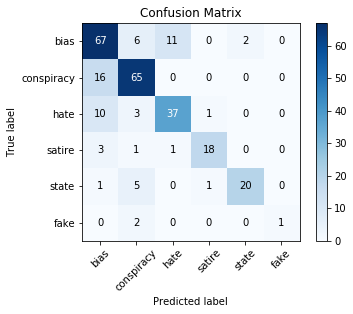

In [32]:
skplt.metrics.plot_confusion_matrix(true_label,pred_label,labels=labels, normalize=False, x_tick_rotation=45)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          1       0.67      0.77      0.72        87
          2       0.77      0.76      0.77        85
          3       0.73      0.69      0.70        54
          4       0.90      0.78      0.84        23
          5       0.91      0.74      0.82        27
          6       0.67      0.70      0.68        23
          7       1.00      0.33      0.50         3

avg / total       0.75      0.74      0.74       302



## Naive-Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
model = GaussianNB()

In [36]:
model.fit(X_train,Y_train)

GaussianNB(priors=None)

In [37]:
predicted= model.predict(X_test)

In [38]:
print(accuracy_score(predicted,Y_test)*100)

58.609271523178805


## Confusion Matrix

In [39]:
predicted_label=pd.Series(predicted).map({
    1:'bias',
    2:'conspiracy',
    3:'hate',
    4:'satire',
    5:'state',
    6:'junksci',
    7:'fake'
})

/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


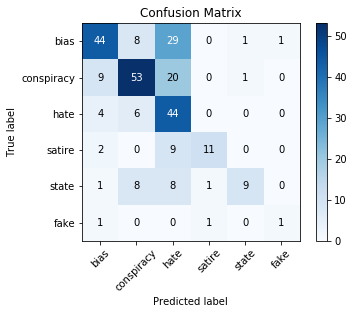

In [40]:
skplt.metrics.plot_confusion_matrix(true_label,predicted_label,labels=labels, normalize=False, x_tick_rotation=45)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predicted))

             precision    recall  f1-score   support

          1       0.71      0.51      0.59        87
          2       0.68      0.62      0.65        85
          3       0.39      0.81      0.52        54
          4       0.85      0.48      0.61        23
          5       0.82      0.33      0.47        27
          6       0.68      0.65      0.67        23
          7       0.50      0.33      0.40         3

avg / total       0.66      0.59      0.59       302



## Decision Trees

In [42]:
from sklearn import tree

In [43]:
clf = tree.DecisionTreeClassifier()

In [44]:
clf = clf.fit(X_train, Y_train)

In [45]:
treepred=clf.predict(X_test)

In [46]:
accuracy_score(Y_test,treepred)*100

77.48344370860927

## Confusion Matrix Decision Tree

In [47]:
predicted_label=pd.Series(treepred).map({
    1:'bias',
    2:'conspiracy',
    3:'hate',
    4:'satire',
    5:'state',
    6:'junksci',
    7:'fake'
})

/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


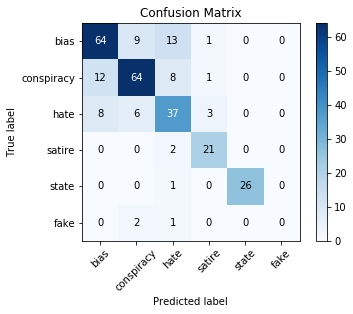

In [48]:
skplt.metrics.plot_confusion_matrix(true_label,predicted_label,labels=labels, normalize=False, x_tick_rotation=45)

In [49]:
print(classification_report(Y_test,treepred))

             precision    recall  f1-score   support

          1       0.75      0.74      0.74        87
          2       0.79      0.75      0.77        85
          3       0.60      0.69      0.64        54
          4       0.81      0.91      0.86        23
          5       1.00      0.96      0.98        27
          6       1.00      0.96      0.98        23
          7       0.00      0.00      0.00         3

avg / total       0.77      0.77      0.77       302



/Users/mukuldevanand/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
